In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/DataSet.csv',index_col=0)

In [4]:
data.head()

,Date,SO2,CO,O3,NO2,PM10,PM25,Temp,Prec,WS,Humi,Pres,cbwd
Station code,,,,,,,,,,,,,
111121,2018-01-01,0.004833,0.554167,0.014583,0.029292,32.666667,17.791667,-1.3,0.0,1.4,39.1,1016.8,290
111122,2018-01-01,0.005417,0.541667,0.011375,0.039750,49.541667,19.899749,-1.3,0.0,1.4,39.1,1016.8,290
111123,2018-01-01,0.007208,0.604167,0.015292,0.030250,34.375000,17.333333,-1.3,0.0,1.4,39.1,1016.8,290
111124,2018-01-01,0.006333,0.433333,0.011542,0.034167,37.125000,19.899749,-1.3,0.0,1.4,39.1,1016.8,290
111125,2018-01-01,0.003667,0.495833,0.020833,0.028708,36.208333,19.899749,-1.3,0.0,1.4,39.1,1016.8,290


In [5]:
data1=data.groupby('Date').mean().copy()

In [6]:
data1.drop(['SO2','CO','O3','NO2','PM25','Temp','Prec','WS','Humi','Pres','cbwd'],axis=1,inplace=True)

## ARIMA -PM10

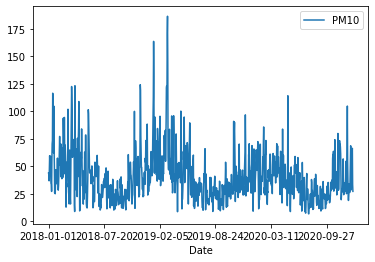

In [7]:
data1.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


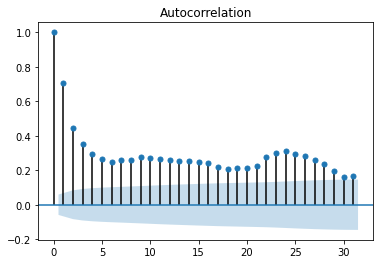

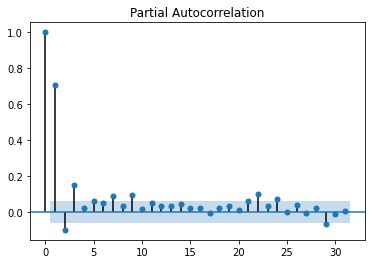

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data1)
plot_pacf(data1)
plt.show()

ACF가 양수이므로 AR 모델을 사용한다. arima(p,d,0)

## 1차 차분

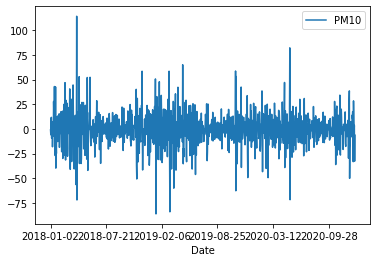

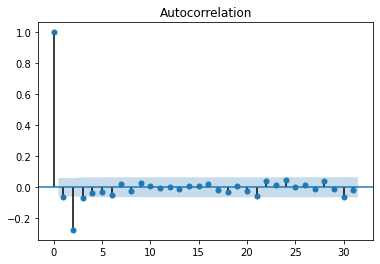

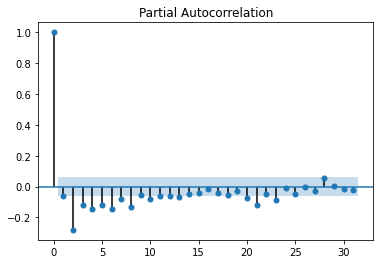

In [9]:
diff_1=data1.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [10]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


model = ARIMA(data1, order=(1,1,0))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='nc', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.PM10   No. Observations:                 1095
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4665.246
Method:                       css-mle   S.D. of innovations             17.142
Date:                Fri, 16 Jul 2021   AIC                           9334.492
Time:                        01:55:20   BIC                           9344.489
Sample:                    01-02-2018   HQIC                          9338.274
                         - 12-31-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.PM10    -0.0640      0.030     -2.121      0.034      -0.123      -0.005
                                    Roots                                    
                  Real          Imaginary      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [11]:
import itertools

In [12]:
p=range(0,3)
d=range(1,2)
q=range(0,3)

pdq=list(itertools.product(p,d,q))

aic=[]

In [13]:
for i in pdq:
    model = ARIMA(data1,order=i)
    model_fit=model.fit()
    aic.append(round(model_fit.aic,2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [14]:
pd.DataFrame({'(p,d,q)': pdq, 'AIC': aic[:9]})

,"(p,d,q)",AIC
0,"(0, 1, 0)",9338.98
1,"(0, 1, 1)",9330.16
2,"(0, 1, 2)",9139.52
3,"(1, 1, 0)",9336.49
4,"(1, 1, 1)",9138.17
5,"(1, 1, 2)",9098.98
6,"(2, 1, 0)",9248.62
7,"(2, 1, 1)",9105.88
8,"(2, 1, 2)",9100.08


In [15]:
model = ARIMA(data1, order=(1,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.PM10   No. Observations:                 1095
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4544.490
Method:                       css-mle   S.D. of innovations             15.342
Date:                Fri, 16 Jul 2021   AIC                           9098.981
Time:                        01:55:22   BIC                           9123.973
Sample:                    01-02-2018   HQIC                          9108.438
                         - 12-31-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0093      0.048     -0.194      0.846      -0.103       0.084
ar.L1.D.PM10     0.3659      0.050      7.259      0.000       0.267       0.465
ma.L1.D.PM10    -0.6099      0.051    -11.86

In [16]:
model = ARIMA(data1, order=(1,1,2))
model_fit = model.fit(trend='nc', full_output=True, disp=True)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.PM10   No. Observations:                 1095
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4544.509
Method:                       css-mle   S.D. of innovations             15.343
Date:                Fri, 16 Jul 2021   AIC                           9097.018
Time:                        01:55:23   BIC                           9117.012
Sample:                    01-02-2018   HQIC                          9104.584
                         - 12-31-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.PM10     0.3657      0.050      7.256      0.000       0.267       0.465
ma.L1.D.PM10    -0.6097      0.051    -11.867      0.000      -0.710      -0.509
ma.L2.D.PM10    -0.3260      0.046     -7.13

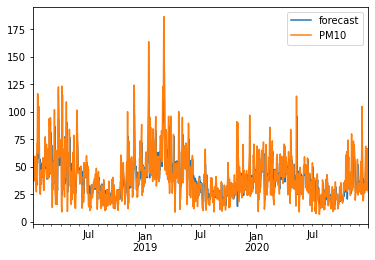

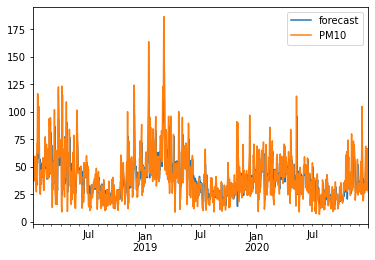

In [17]:
model_fit.plot_predict()

In [18]:
fore = model_fit.forecast(steps=60)

In [19]:
tset=pd.read_csv('/content/drive/MyDrive/testset.csv')

In [20]:
y_test=tset.PM10[:60]

In [21]:
x_test=fore[0]

### ARIMA PM10 Result 

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(x_test,y_test)
mse = mean_squared_error(x_test,y_test)
print('===== 결과 =====')
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % mse**0.5)

===== 결과 =====
MAE: 11.646
MSE: 209.184
RMSE: 14.463


In [23]:
data2=data.groupby('Date').mean().copy()

## ARIMA -PM2.5

In [24]:
data2.drop(['SO2','CO','O3','NO2','PM10','Temp','Prec','WS','Humi','Pres','cbwd'],axis=1,inplace=True)

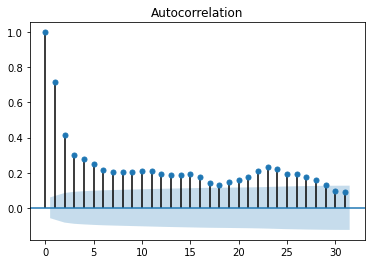

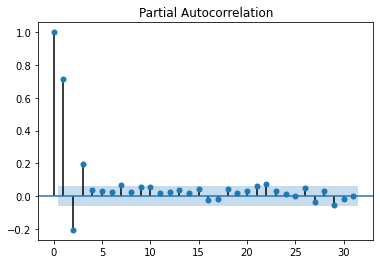

In [25]:
plot_acf(data2)
plot_pacf(data2)
plt.show()

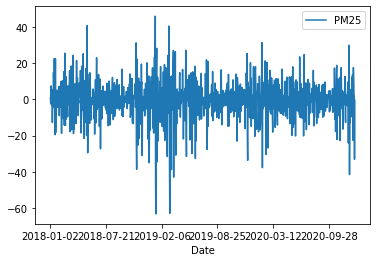

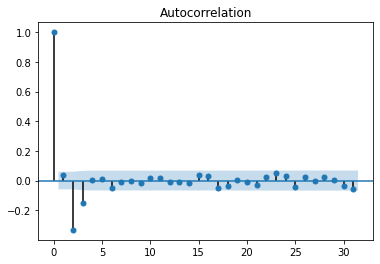

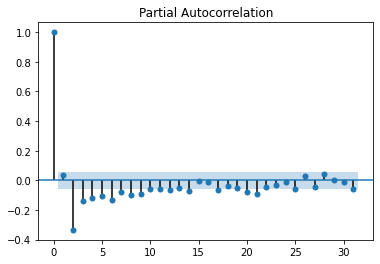

In [26]:
diff_1=data2.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [27]:
model = ARIMA(data2, order=(1,1,0))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='nc', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.PM25   No. Observations:                 1095
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4157.955
Method:                       css-mle   S.D. of innovations             10.786
Date:                Fri, 16 Jul 2021   AIC                           8319.911
Time:                        01:55:25   BIC                           8329.908
Sample:                    01-02-2018   HQIC                          8323.694
                         - 12-31-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.PM25     0.0345      0.030      1.143      0.253      -0.025       0.094
                                    Roots                                    
                  Real          Imaginary      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [28]:
p=range(0,3)
d=range(1,2)
q=range(0,3)

pdq=list(itertools.product(p,d,q))

aic=[]

for i in pdq:
    model = ARIMA(data2,order=i)
    model_fit=model.fit()
    aic.append(round(model_fit.aic,2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [29]:
pd.DataFrame({'(p,d,q)': pdq, 'AIC': aic})

,"(p,d,q)",AIC
0,"(0, 1, 0)",8321.22
1,"(0, 1, 1)",8319.59
2,"(0, 1, 2)",8125.59
3,"(1, 1, 0)",8321.91
4,"(1, 1, 1)",8149.67
5,"(1, 1, 2)",8059.63
6,"(2, 1, 0)",8193.06
7,"(2, 1, 1)",8075.21
8,"(2, 1, 2)",8061.19


In [30]:
model = ARIMA(data2, order=(1,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.PM25   No. Observations:                 1095
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4024.815
Method:                       css-mle   S.D. of innovations              9.545
Date:                Fri, 16 Jul 2021   AIC                           8059.630
Time:                        01:55:27   BIC                           8084.623
Sample:                    01-02-2018   HQIC                          8069.087
                         - 12-31-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0010      0.030     -0.033      0.974      -0.059       0.058
ar.L1.D.PM25     0.4033      0.042      9.566      0.000       0.321       0.486
ma.L1.D.PM25    -0.5252      0.040    -13.00

In [31]:
model = ARIMA(data2, order=(1,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='nc', full_output=True, disp=True)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.PM25   No. Observations:                 1095
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4024.816
Method:                       css-mle   S.D. of innovations              9.545
Date:                Fri, 16 Jul 2021   AIC                           8057.631
Time:                        01:55:27   BIC                           8077.625
Sample:                    01-02-2018   HQIC                          8065.197
                         - 12-31-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.PM25     0.4033      0.042      9.566      0.000       0.321       0.486
ma.L1.D.PM25    -0.5252      0.040    -13.004      0.000      -0.604      -0.446
ma.L2.D.PM25    -0.4143      0.035    -11.67

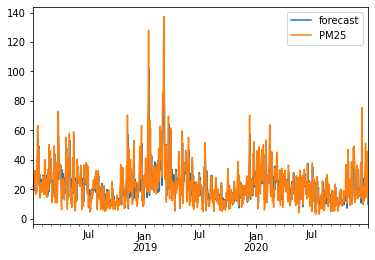

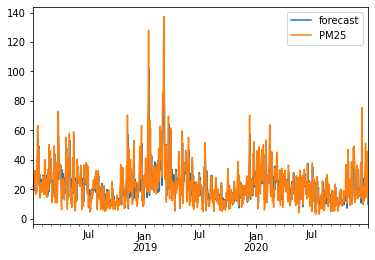

In [32]:
model_fit.plot_predict()

In [33]:
y_test=tset.PM25[:60]

In [34]:
fore = model_fit.forecast(steps=60)

In [35]:
x_test=fore[0]

### ARIMA PM2.5 Result 

In [38]:
mae = mean_absolute_error(x_test,y_test)
mse = mean_squared_error(x_test,y_test)
print('===== 결과 =====')
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % mse**0.5)

===== 결과 =====
MAE: 11.646
MSE: 209.184
RMSE: 14.463
